### Задание 1
Импортируйте библиотеки pandas и numpy.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics

In [2]:
import pandas as pd
import numpy as nm

from sklearn.datasets import load_boston

Загрузим Boston House Prices dataset

In [3]:
boston = load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Создадим датафрейм **X**

In [7]:
X = pd.DataFrame(boston["data"], columns=boston["feature_names"])

In [8]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Создадим датафрейм **y**

In [10]:
y = pd.DataFrame(boston["target"], columns=["price"])

In [11]:
y.info

<bound method DataFrame.info of      price
0     24.0
1     21.6
2     34.7
3     33.4
4     36.2
..     ...
501   22.4
502   20.6
503   23.9
504   22.0
505   11.9

[506 rows x 1 columns]>

Разобьем датафреймы на тренировочные(X_train, y_train) и тестовые (X_test, y_test)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

Создадим модель линейной регрессии

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

Обучим модель на тренировочных данных

In [17]:
lr.fit(X_train, y_train)

LinearRegression()

Сделаем предсказание на тестовых данных

In [18]:
y_pred = lr.predict(X_test)

y_pred.shape

(152, 1)

Вычислим $R^2$

In [19]:
from sklearn.metrics import r2_score

In [21]:
r2 = r2_score(y_test, y_pred)

print(f"R2 = {r2}")

R2 = 0.711226005748496


### Задание 2
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.

Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.

Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
model = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42)

In [26]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, random_state=42)

In [27]:
y_pred_rfr = model.predict(X_test)

y_pred_rfr.shape

(152,)

In [28]:
r2_rfr = r2_score(y_test, y_pred_rfr)

print(f"R2 = {r2_rfr}")

R2 = 0.8713629100115731


In [39]:
print(f"Модель LinearRegression:\t R2 = {r2}")
print(f"Модель RandomForestRegressor:\t R2 = {r2_rfr}")
print(f"В данном случае лучше работает модель {'LinearRegression' if r2 > r2_rfr else 'RandomForestRegressor'},"
      , f"так как {r2 if r2 > r2_rfr else r2_rfr} > {r2_rfr if r2 <= r2_rfr else r2}")

Модель LinearRegression:	 R2 = 0.711226005748496
Модель RandomForestRegressor:	 R2 = 0.8713629100115731
В данном случае лучше работает модель RandomForestRegressor, так как 0.8713629100115731 > 0.8713629100115731


### Задание 3*
Вызовите документацию для класса RandomForestRegressor, найдите информацию об атрибуте feature_importances_.

С помощью этого атрибута найдите сумму всех показателей важности, установите, какие два признака показывают наибольшую важность.

In [40]:
model.feature_importances_

array([0.03156131, 0.00157971, 0.00632109, 0.00195516, 0.01218203,
       0.43991998, 0.01169943, 0.06559869, 0.0049734 , 0.01204653,
       0.01981805, 0.01157518, 0.38076945])

In [54]:
print(f"Сумма всех показателей важности = {model.feature_importances_.sum()}")

Сумма всех показателей важности = 1.0


In [41]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

Представим показатели важности в виде словаря

In [42]:
feats = {}
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance

In [56]:
print(f"Показатели важности = {feats}")

Показатели важности = {'CRIM': 0.031561314837096635, 'ZN': 0.0015797116818036937, 'INDUS': 0.006321085970199716, 'CHAS': 0.001955156817235648, 'NOX': 0.012182028201858245, 'RM': 0.4399199777727731, 'AGE': 0.011699432455240645, 'DIS': 0.06559868617178756, 'RAD': 0.004973400949848369, 'TAX': 0.012046528072725599, 'PTRATIO': 0.019818047396274786, 'B': 0.011575177451266955, 'LSTAT': 0.38076945222188924}


Отобразим их на графике в порядке важности

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

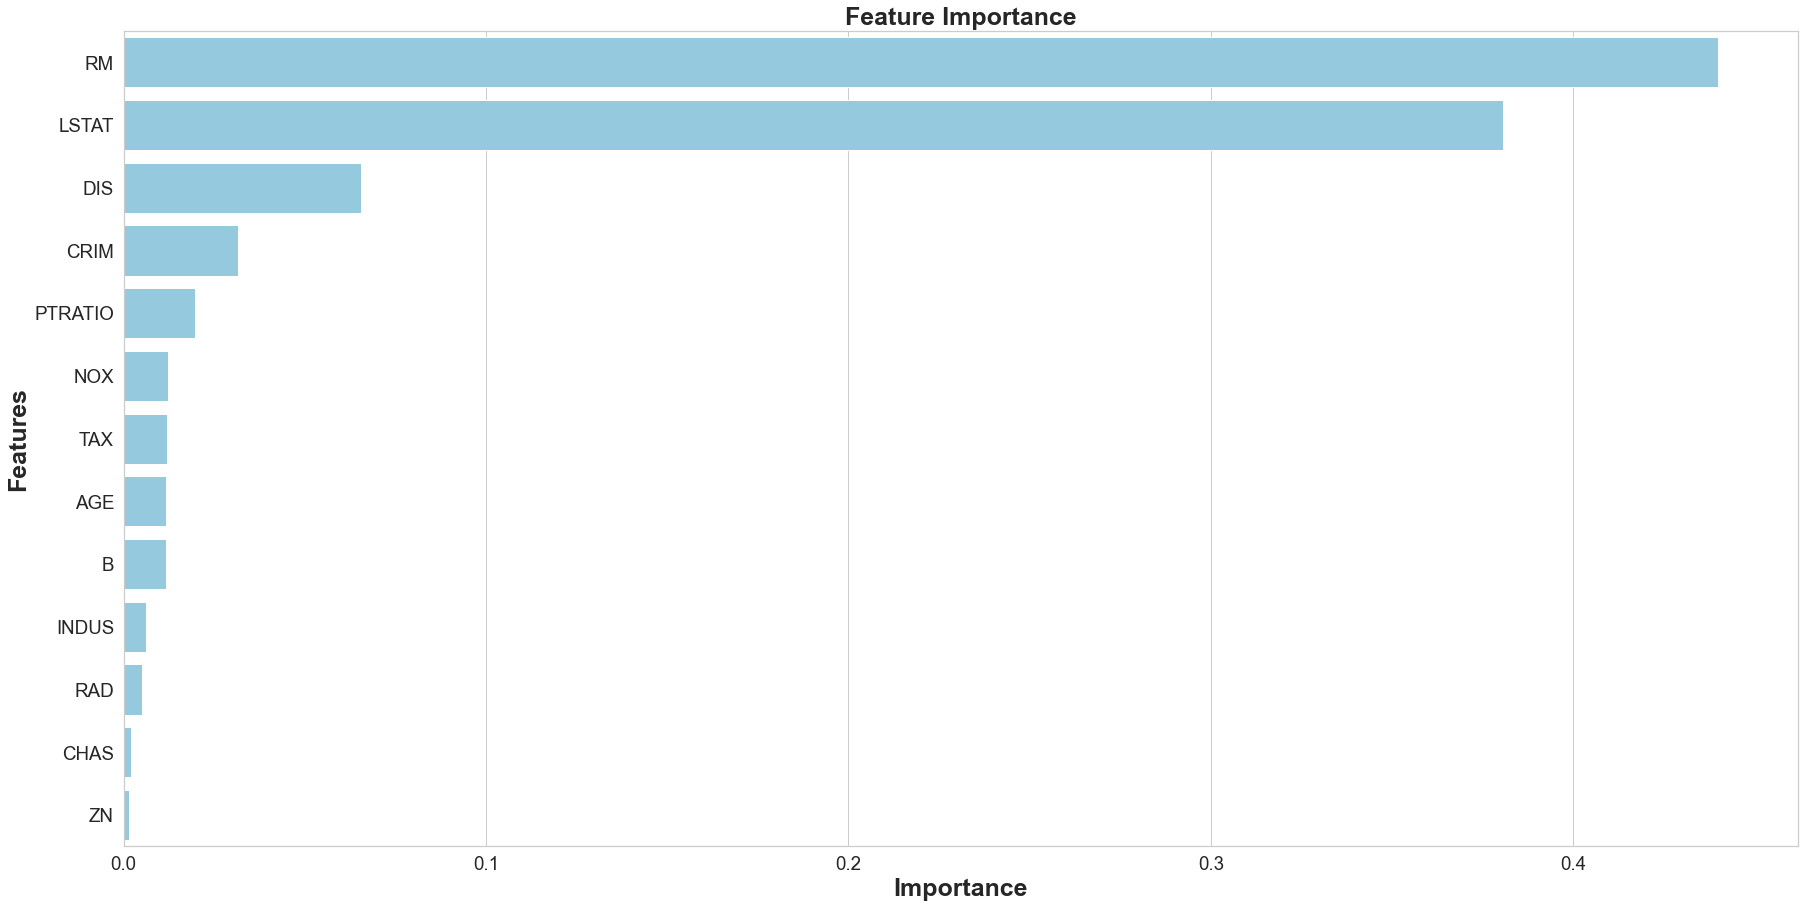

None

,Features,Gini-Importance
0,RM,0.439920
1,LSTAT,0.380769
2,DIS,0.065599
3,CRIM,0.031561
4,PTRATIO,0.019818
5,NOX,0.012182
6,TAX,0.012047
7,AGE,0.011699
8,B,0.011575
9,INDUS,0.006321


In [52]:
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

Ответ: **RM** и **LSTAT** два наиболее  важных показателя